# Data sourcing

Data sourcing is loading the data which can be in any format for example:.csv into the data frame for analysis.Here in uber case study the file format is .csv

In [139]:
# Data sourcing
#importing the uber request data excel file into a dataframe
import pandas as pd
uber=pd.read_csv("C:/Users/Admin/Downloads/Uber Request Data.csv")

In [140]:
# Displayiing the dataframe created
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


# Data cleaning

Data cleaning is ->fixing rows and columns ->fix missing values ->Standardising values ->invalid values ->Filtering data.

In [141]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 210.8+ KB


There are 6745 rows that means we have data of 6745 request made by customers

In [142]:
round(100*(uber.isnull().sum()/len(uber.index)), 2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

58% null values are present in drop timestamp column we cant drop it as it will effect the further anlysis by also removing the whole row which also contains cancelled and no cars available problems under Status column.Same is the reason behind 38% null values present in Driver id column.

->Fixing rows and columns

In [143]:
# checking for any duplicated rows in the dataframe
# if the whole row is duplicate it will return true
uber.duplicated

<bound method DataFrame.duplicated of       Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379 

There are no duplicates in row

-->splitting of rows and columns 

For more data For deriving date and time columns from timestamp column the data type of that column should be datetime

In [144]:
uber.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

Both timestamp data type is object

In [145]:
#Request timestamp and Drop timestamp columns have object datatype 
#so it must be changed into datetime for extracting seperate columns
#to convert the dates and time in the proper format.
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'])
uber.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

Both timestamp data type is datetime

In [146]:
#here it is observed that the dates and time are in the proper format. 
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [147]:
# Rename all of the columns, keeping them in order
# this step is not necessary(optional)
uber.columns = ['Request_id', 'Pickup_point', 'Driver_id', 'Status','Request_timestamp','Drop_timestamp']
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [148]:
#splitting of column Request timestamp into Request month, Request day and Request hour
uber['Request_date']=uber['Request_timestamp'].dt.date
uber['R_month'] = uber['Request_timestamp'].dt.month
uber['R_day'] = uber['Request_timestamp'].dt.day
uber['R_hour'] = uber['Request_timestamp'].dt.hour
uber.head(5)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,R_month,R_day,R_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,11,7,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,12,7,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,12,7,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,7,13,8


In [149]:
#The maximum Request time and date is
uber.Request_timestamp.max()

Timestamp('2016-12-07 23:54:00')

In [150]:
# The minimum Drop time and date is
uber.Drop_timestamp.min()

Timestamp('2016-07-13 00:01:12')

# Basic analysis on column Status and Pickup point

Status and Pickup point columns are univariate unordered categorical variables.log-scale plotting is used for such variables.But here I have used simple bar plottings because log scale is only used when there is a huge difference between the frequency of values.

In [151]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [152]:
uber.Pickup_point.value_counts().sort_index()


Airport    3238
City       3507
Name: Pickup_point, dtype: int64

From above we analys that the requests made from airport=3238 and the request made from city=3507

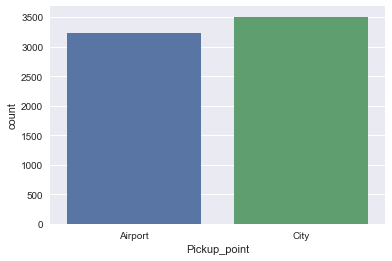

In [153]:
#Showing the same by using plots
sns.countplot(uber.Pickup_point)

In [190]:
uber.Staus.value_counts().sort_index()

AttributeError: 'DataFrame' object has no attribute 'Staus'

The number of trip completedd from city to airport or from airport to city =2831.From above it is clear that the cancellation problem of the cab is lesser than no cars available problem

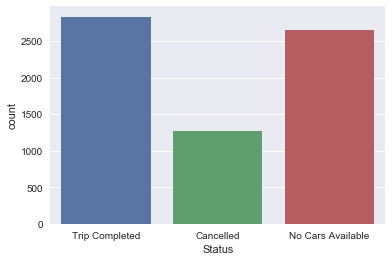

In [155]:
#Showing the same by using plots
sns.countplot(uber.Status)

crosstab bar plotting is mostly used through out the analysis as it will precisely show the exact ratio against each value.

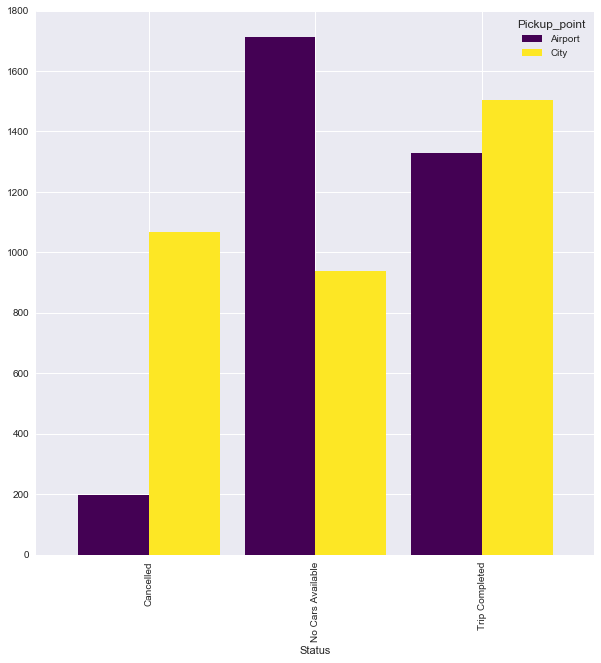

In [156]:
# showing the exact amount of cancellation and no cars available problem 
# across each status
pd.crosstab(uber.Status, uber.Pickup_point).plot.bar(width = 0.85, figsize=(10,10), 
                                                                    colormap='viridis')

The purple colour indicates from airport to city and yellow from city to airport

From the above crosstab bar plotting it is clear that the no cars available problem is maximum from airport to city and next the cancellation problem is highest from city to airport

# Analysis on Request timestamp

In [157]:
# checking distinct dates which exists in the request timestamp
uber.Request_date.unique()

array([datetime.date(2016, 11, 7), datetime.date(2016, 12, 7),
       datetime.date(2016, 7, 13), datetime.date(2016, 7, 14),
       datetime.date(2016, 7, 15)], dtype=object)

The data exists only of the year 2016.There are 5 unique request dates in the year 2016.

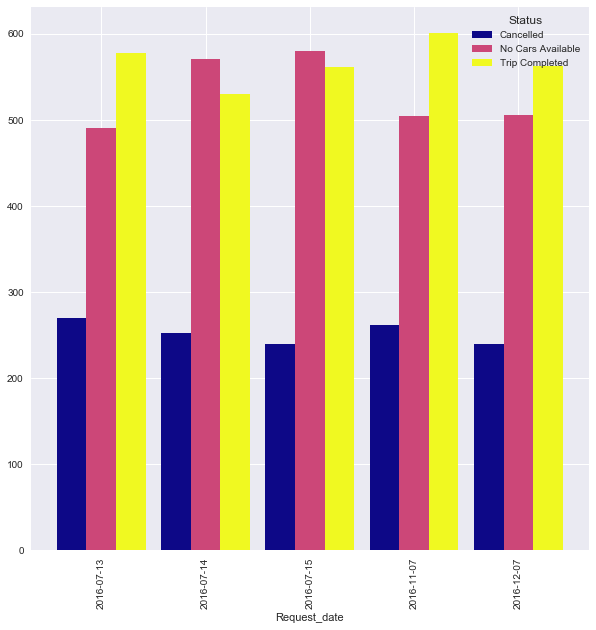

In [187]:
# analysis for each unique date
pd.crosstab(uber.Request_date, uber.Status).plot.bar(width = 0.85, figsize=(10,10), 
                                                                    colormap='plasma')

In the above crosstab bar plotting on x axis is unique request dates and the hue representing 3 different status. The maximum number of cancellations are done on july-13 and no cars available problem arises maximum on july-15.

In [159]:
# there are only four unique days 7,13,14,15.
uber.R_day.unique()

array([ 7, 13, 14, 15], dtype=int64)

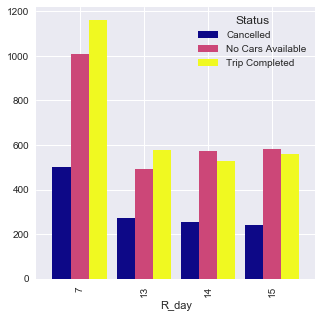

In [189]:
# analysis for each day irrespective of month across each status is shown below
pd.crosstab(uber.R_day, uber.Status).plot.bar(width = 0.85, figsize=(5,5), 
                                                                    colormap='plasma')

We can observe that the under status-cancelled the 7th day have the highest cancellation and 15th have the least cancellations.Status-no cars available problem arises maximum on 7th day and least on 13th day.

In [161]:
# there are only five unique months 7,11,12.
uber.R_month.unique()

array([11, 12,  7], dtype=int64)

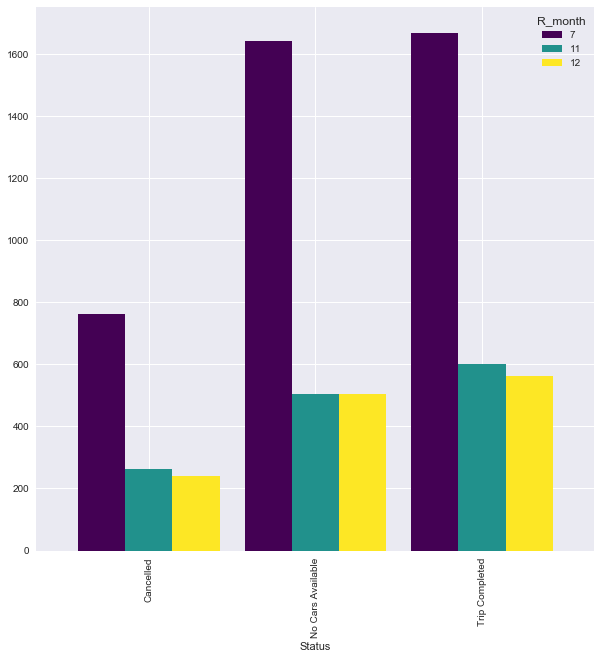

In [162]:
# analysis for each unique month irrespective of day across each status is shown below
pd.crosstab(uber.Status, uber.R_month).plot.bar(width = 0.85, figsize=(10,10), 
                                                                    colormap='viridis')

Cancellations are maximum in the month of 7 i.e july and least on 12 i.e december.No car available problem is highest of all in 7th month and equal on 11th and 12th month.

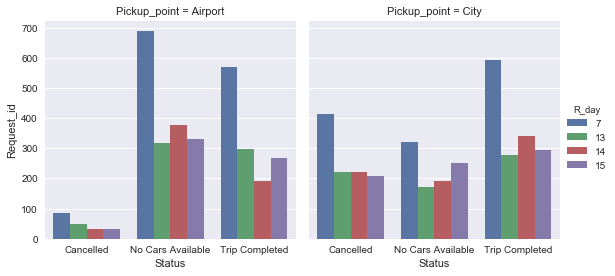

In [163]:
#factor plot is used because it will show the proportion within the values of different attributes at a single plot
#subplots creation is also possible with faactor plotting.
# combining all days
uber_demand = uber[['Pickup_point', 'Request_id','R_day', 
                 'Status']].groupby(['Pickup_point', 'Status','R_day']).count()
uber_demand = uber_demand.reset_index()
uber_demand
sns.factorplot(x="Status", y="Request_id",
               hue="R_day", col="Pickup_point",data=uber_demand, kind="bar")

The above factorplot is used to represent the combined data for all days irrespective of a particular month.The 7th day is having higher no.of request id's across each status in respective pickup points.

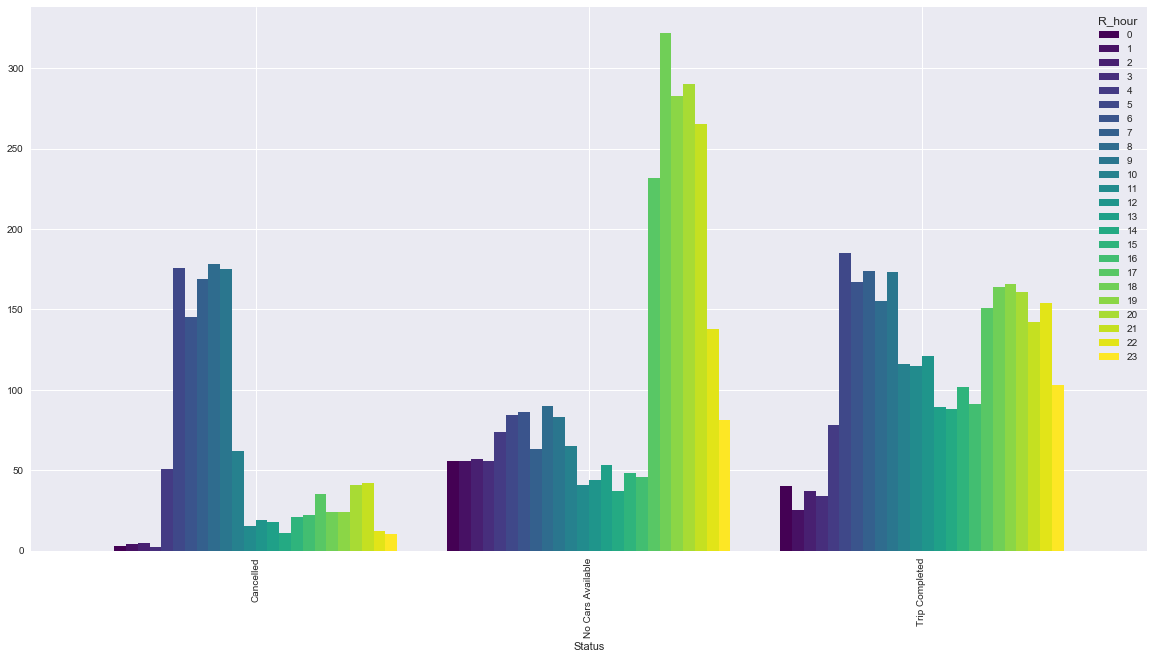

In [164]:
# there is 24 hours format representation of hours column i.e 0 to 23 where 0 represents 12 am midnight
pd.crosstab(uber.Status, uber.R_hour).plot.bar(width = 0.85, figsize=(20,10), 
                                                                    colormap='viridis')

No cars available problem arises maximum between 17 to 21 i.e 5pm to 9pm(evening).
Cancellation of cab occur maximum between  5 to 9 i.e 5am to 9am(morning)
This plotting is clear and in detail by using time slots futher.


# Supply-Demand gap

In [165]:
# Percent of Null values calculated for each column 
round(100*(uber.isnull().sum()/len(uber.index)), 2)

Request_id            0.00
Pickup_point          0.00
Driver_id            39.29
Status                0.00
Request_timestamp     0.00
Drop_timestamp       58.03
Request_date          0.00
R_month               0.00
R_day                 0.00
R_hour                0.00
dtype: float64

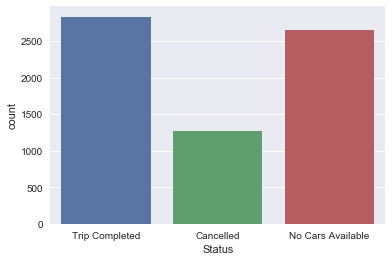

In [166]:
sns.countplot(uber.Status)

Driver_id column is having 39% null values which means no cars available is 39.29% out of total 58%.From the above bar plotting it is clear that no cars available is the major reason behing 58% supply-demad gap.Remaining 18.7% is the cancellation problem.

# Time slots

Request hour is divided into 5 categories.

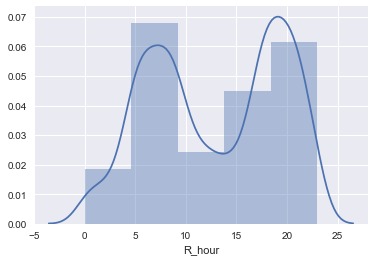

In [167]:
#binning time into 5 categories
sns.distplot(uber.R_hour, bins=5)

The kde(Kernel Density Estimate) may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis.In this distplot the kde curve shows the distribution is high during morning  and evening

In [168]:
# slotting time into early morning,morning,afternon,evening,night and creating a new column.
def time_period(x):
    'divide day time into 4 categories'
    if x<5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Afternoon"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Night"
uber["time_slot"] = uber.R_hour.apply(lambda x: time_period(x))
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,R_month,R_day,R_hour,time_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,7,11,Afternoon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,11,7,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,12,7,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,12,7,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,7,13,8,Morning


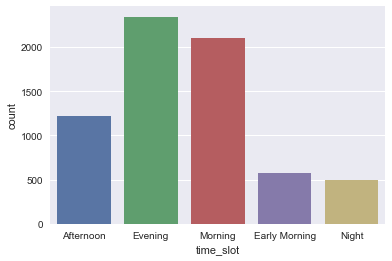

In [169]:
# demand of Trips during different slots
sns.countplot(uber.time_slot)

The bar chart is used to show the proportion of demands for each tim slot in uber data frame.The maximum demand is during evening and next comes the morning slot.

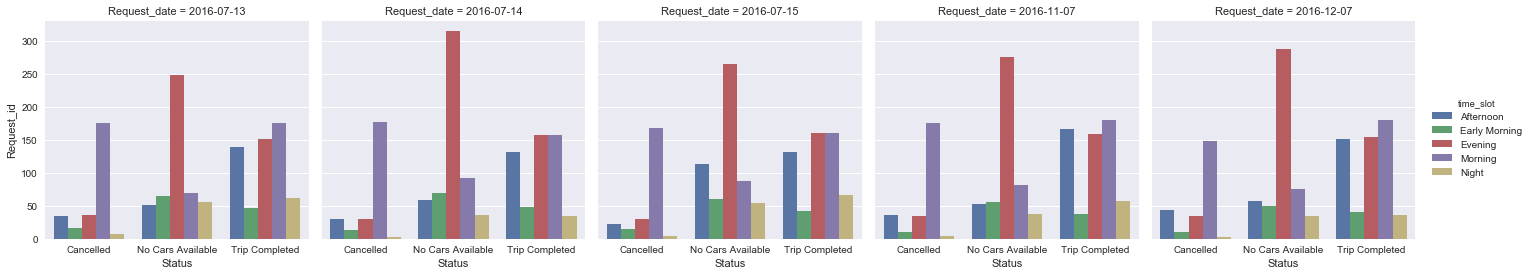

In [170]:
#analysis for each day on hourly basis
uber_timestamp = uber[['Request_date', 'Request_id','time_slot', 
                 'Status']].groupby(['Request_date','time_slot','Status']).count()
uber_timestamp = uber_timestamp.reset_index()
sns.factorplot(x="Status", y="Request_id",
hue="time_slot", col="Request_date",data=uber_timestamp, kind="bar")

No cars available problem is highest on 2016-07-14 in evening slot and cacellation of cars is almost equal in proportion in all dates except 2016-12-07.

In [171]:
#for plotting time slot across satus and no.of request made
uber_timestamp = uber[['time_slot', 'Request_id','Status']].groupby(['time_slot', 'Status']).count()
uber_timestamp

Request_id
time_slot     Status                       
Afternoon     Cancelled                 168
              No Cars Available         334
              Trip Completed            722
Early Morning Cancelled                  65
              No Cars Available         299
              Trip Completed            214
Evening       Cancelled                 166
              No Cars Available        1392
              Trip Completed            784
Morning       Cancelled                 843
              No Cars Available         406
              Trip Completed            854
Night         Cancelled                  22
              No Cars Available         219
              Trip Completed            257

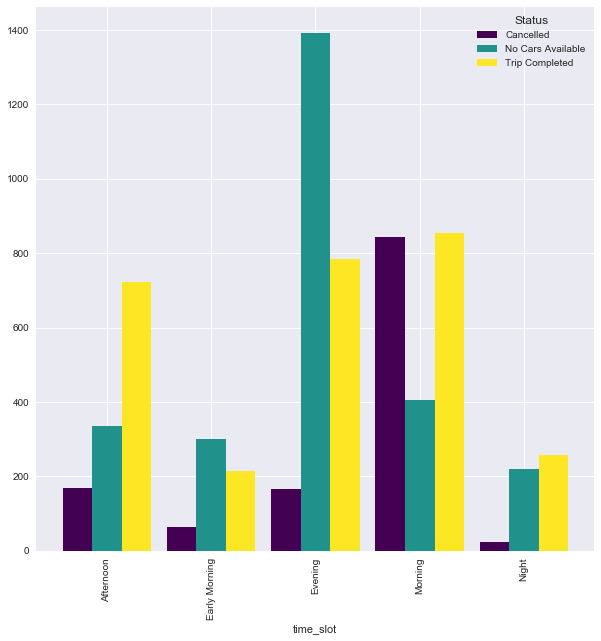

In [180]:
# the data above is represented in the form of bar chart for better understanding
pd.crosstab(uber.time_slot, uber.Status).plot.bar(width = 0.85, figsize=(10,10), 
                                                                    colormap='viridis')

This is plotting of Status across time slots represented in crosstab bar plot as it will accurately specify each timeslot across each status.We consider only two Status during analysis.The major problem is Non-availability of cabs at evening time slot and cancellation of cabs is done maximum on morning time slot.  

So the conclusion is evening and morning are the timeslots where the highest gap exists.

# Supply-Demand gap in pickup points

In [173]:
# to find the no. of request made from 2 unique pickup points.
uber.Pickup_point.value_counts()

City       3507
Airport    3238
Name: Pickup_point, dtype: int64

In [174]:
# to calculate the no. of trip completed from airport to city and vice-versa.
uber_timestamp = uber[['Pickup_point', 'Request_id','Status']].groupby(['Pickup_point', 'Status']).count()
uber_timestamp

Request_id
Pickup_point Status                       
Airport      Cancelled                 198
             No Cars Available        1713
             Trip Completed           1327
City         Cancelled                1066
             No Cars Available         937
             Trip Completed           1504

No.of trip request made from airport=3238,Trip completed from Airport to City=1327

No.of trip request made from city=3507,Trip completed from City to Airport=1504

The supply-demand gap is huge from the city(Pickup point)-->this is analysed irrespective of the time slots.

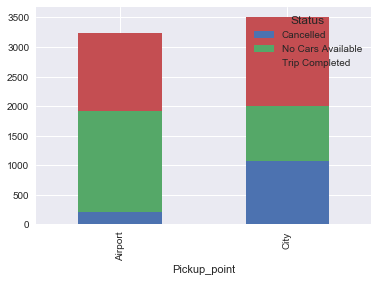

In [175]:
# the above analysis done is shown in the form of plotting.
a=pd.crosstab(uber.Pickup_point, uber.Status)
a.plot.bar(stacked = True)

In [176]:
# data representing times slots and pickup point across each status
uber_timestamp = uber[['Pickup_point', 'Request_id','time_slot', 
                 'Status']].groupby(['Pickup_point','time_slot','Status']).count()
uber_timestamp

Request_id
Pickup_point time_slot     Status                       
Airport      Afternoon     Cancelled                  64
                           No Cars Available          87
                           Trip Completed            327
             Early Morning Cancelled                   2
                           No Cars Available         148
                           Trip Completed            103
             Evening       Cancelled                 106
                           No Cars Available        1321
                           Trip Completed            373
             Morning       Cancelled                  23
                           No Cars Available          21
                           Trip Completed            382
             Night         Cancelled                   3
                           No Cars Available         136
                           Trip Completed            142
City         Afternoon     Cancelled                 104
                           No Cars Available         247
                           Trip Completed            395
             Early Morning Cancelled                  63
                           No Cars Available         151
                           Trip Completed            111
             Evening       Cancelled                  60
                           No Cars Available          71
                           Trip Completed            411
             Morning       Cancelled                 820
                           No Cars Available         385
                           Trip Completed            472
             Night         Cancelled                  19
                           No Cars Available          83
                           Trip Completed            115

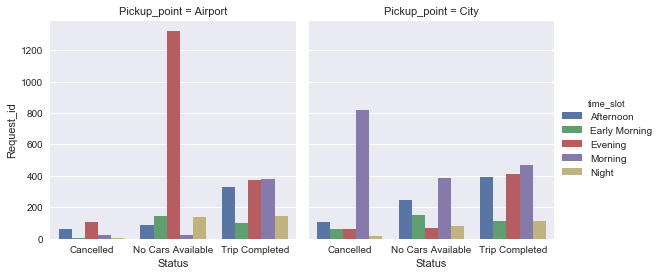

In [177]:
#conclusion
#plotting for above data
uber_timestamp = uber[['Pickup_point', 'Request_id','time_slot', 
                 'Status']].groupby(['Pickup_point','time_slot','Status']).count()
uber_timestamp = uber_timestamp.reset_index()
uber_timestamp
sns.factorplot(x="Status", y="Request_id",
hue="time_slot", col="Pickup_point",data=uber_timestamp, kind="bar")

Above is the factor plot which shows the supply and demand gap for the pickup point with respect to time slots.
Majorly airprt to city have the highest supply demand gap i.e 1321 in evening time slot.
Next highest is city is airport having 820 supply demand gap in morning time slot